In [123]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

We want to simulate the following equation:
$$\partial_t v(x,t)= W(x)+D \nabla^2 v(x,t) + D(\nabla v(x,t))^2$$
We can rescale everything and modify both the time scale and the noise strength:
$$\partial_t v(x,t)= W(x)+\nabla^2 v(x,t) + (\nabla v(x,t))^2$$
Here $W(x) \sim \mathcal{U}(0,W_d)$. The one dimensional equilbrium case is:
$$ -4a^2W_i = 4v_{i+1} - 8v_i + 4v_{i-1} + v_{i+1}^2-2v_{i-1}v_{i+1}+v_{i-1}^2$$
$$v_{i+1}^2+v_{i+1}(4-2v_{i-1})+(4a^2 W_i - 8v_i + 4v_{i-1}+v_{i-1}^2)=0$$

In [145]:
def nextValue(w_here, v_here, v_prev,dx):
    a = 1.0
    b = 4-2*v_prev
    c=4*dx*dx*w_here-8*v_here+4*v_prev-v_prev*v_prev
    dlt = b*b-4*a*c
    v1 = (-b-np.sign(b)*np.sqrt(dlt))/(2*a)
    v2 = c/(a*v1)
    return min(max((v1,v2)), 0)

In [146]:
def simulate(dx, N, W_d, v0=0, v1=0):
    v = np.zeros(N)
    v[0]=v0
    v[1]=v1
    W = np.random.rand(N)*W_d
    for i in range(1,N-1):
        v_here = v[i]
        v_prev = v[i-1]
        v[i+1]=nextValue(W[i], v_here, v_prev,dx)
    return v

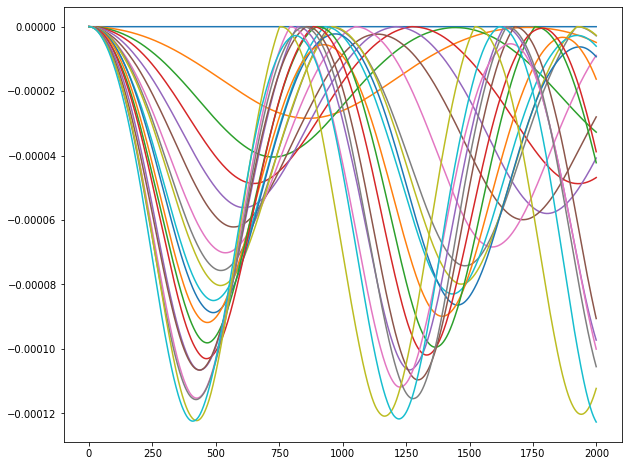

In [148]:
dx=0.0001
N=2000
fig = plt.figure(figsize=(10,8))
for i,W_d in enumerate(np.linspace(0.0,0.5,20)):
    v = simulate(dx, N, W_d, 0,0)
    plt.plot(v, label=W_d)